In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [41]:
def true_func(x: float) -> float:
    return np.cos(1.5 * np.pi * x)

In [42]:
n_samples = 40
degrees = [1, 2, 3, 4, 15, 20, 30]
scale = 0.1

x = np.sort(np.random.rand(n_samples))
x = x[:, np.newaxis]
y = true_func(x) + np.random.rand(n_samples) * scale
y = y[:, np.newaxis]

In [43]:
def plot(pipe: Pipeline, scores: np.ndarray, degree: int, y: np.ndarray) -> None:
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, pipe.predict(x_test[:, np.newaxis]), label="Model")
    plt.plot(x_test, true_func(x_test), label="True Function")
    plt.scatter(x, y, edgecolor="b", s=20, label="Sample Data")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title(f"Degree {degree}\nMSE = {-scores.mean():.2e}")
    plt.show()

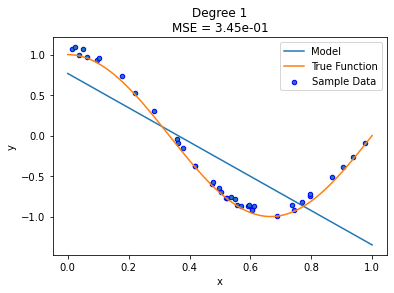

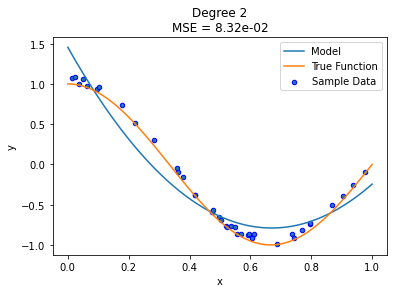

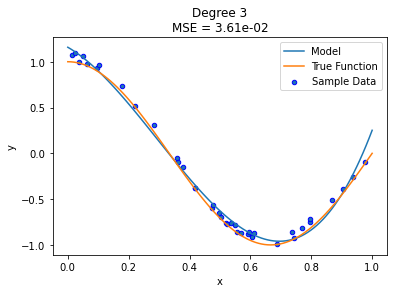

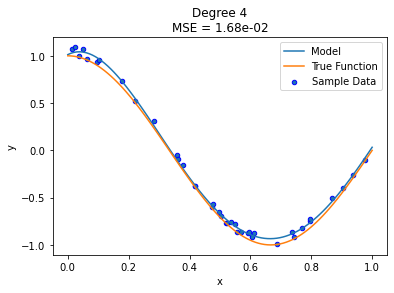

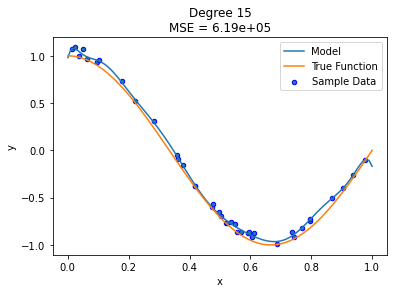

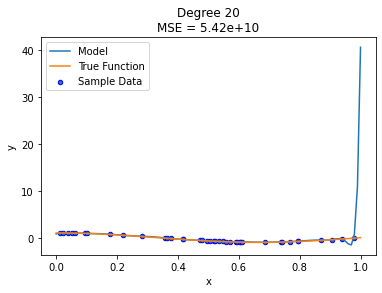

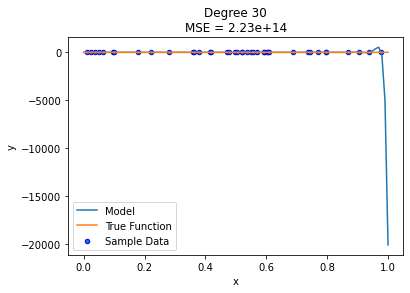

In [44]:
for deg in degrees:
    regression = LinearRegression()
    features = PolynomialFeatures(degree=deg, include_bias=False)
    pipe = Pipeline([
        ("polynomial_features", features),
        ("linear_regression", regression),
    ])
    pipe.fit(x, y)
    scores = cross_val_score(pipe, x, y, scoring="neg_mean_squared_error", cv=10)
    plot(pipe, scores, deg, y)

#### With Ridge Regression

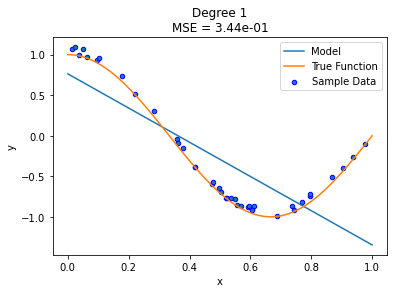

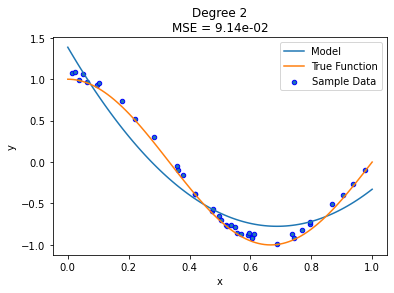

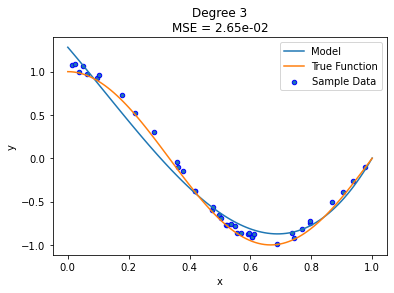

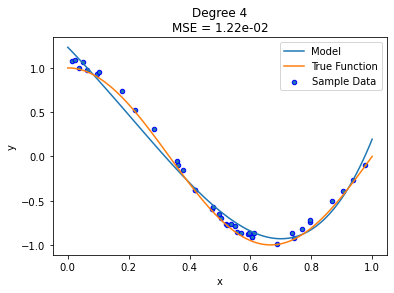

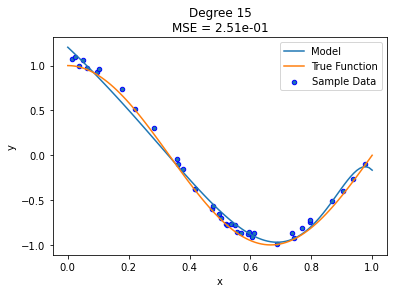

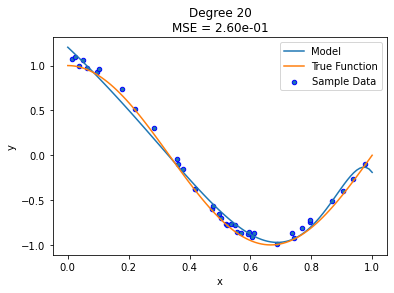

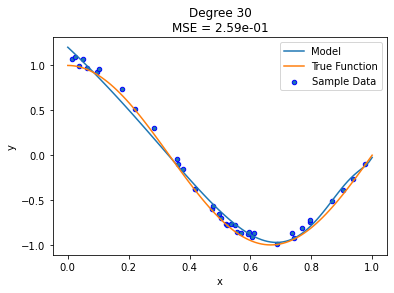

In [45]:
from sklearn.linear_model import Ridge

for deg in degrees:
    features = PolynomialFeatures(degree=deg, include_bias=False)
    regression = Ridge(alpha=0.01)
    pipe = Pipeline([
        ("polynomial_features", features),
        ("linear_regression", regression),
    ])
    pipe.fit(x, y)

    scores = cross_val_score(pipe, x, y, scoring="neg_mean_squared_error", cv=10)

    plot(pipe, scores, deg, y)

#### With Lasso Regression

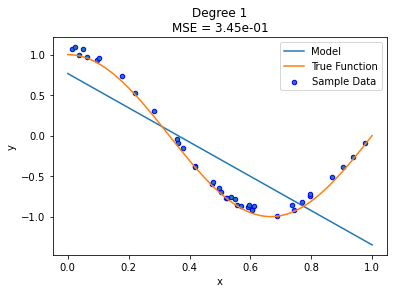

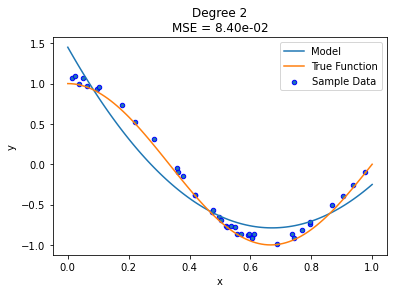

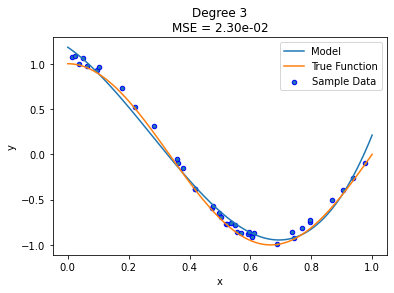

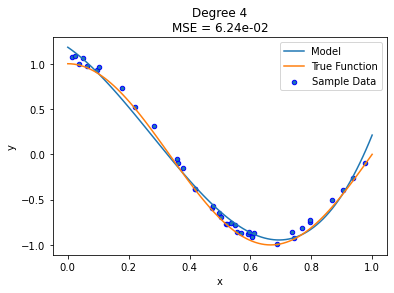

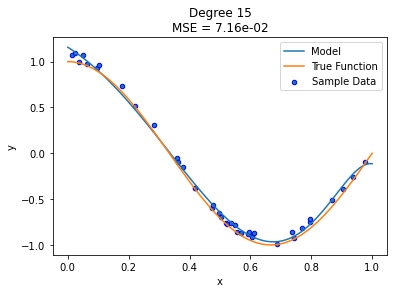

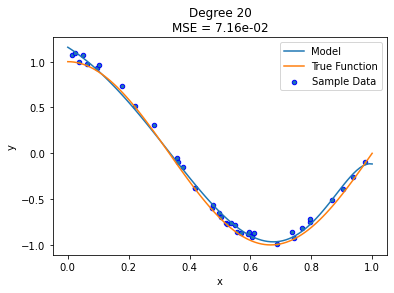

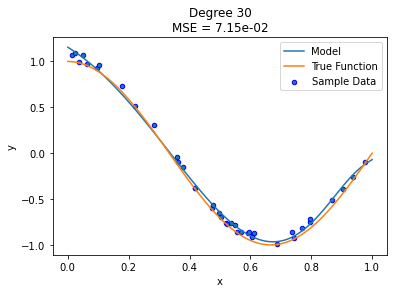

In [46]:
from sklearn.linear_model import Lasso

for deg in degrees:
    features = PolynomialFeatures(degree=deg, include_bias=False)
    regression = Lasso(alpha=0.0001, max_iter=30000)

    pipe = Pipeline([
        ("polynomial_features", features),
        ("linear_regression", regression)
    ])
    pipe.fit(x, y)

    scores = cross_val_score(pipe, x, y, scoring="neg_mean_squared_error", cv=10)

    plot(pipe, scores, deg, y)